In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import glob
from pandas_datareader import data
dateparse = lambda x: pd.to_datetime(x, format='%m%d%Y')

In [3]:
import os
import sys
import pandas as pd
from pandas import *
import numpy as np
import pandas.tseries as pts
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

C:\Users\Dell\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Task # 1


Importing all period data

In [4]:
data = pd.read_excel('GSPC.xlsx')

In [5]:
print data.head()

        Date        GSPC         N225
0 1980-01-01  114.160004  6764.890137
1 1980-02-01  113.660004  6556.189941
2 1980-03-01  102.089996  6865.560059
3 1980-04-01  106.290001  6855.700195
4 1980-05-01  111.239998  6870.700195


In [6]:
print data.dtypes

Date    datetime64[ns]
GSPC           float64
N225           float64
dtype: object


In [5]:
data.set_index(data['Date'], inplace=True)

In [6]:
data.set_index('Date', inplace=True) 

In [9]:
print data.head()

                  GSPC         N225
Date                               
1980-01-01  114.160004  6764.890137
1980-02-01  113.660004  6556.189941
1980-03-01  102.089996  6865.560059
1980-04-01  106.290001  6855.700195
1980-05-01  111.239998  6870.700195


Generating returns

In [7]:
returns = 100 * data['GSPC'].pct_change().dropna()

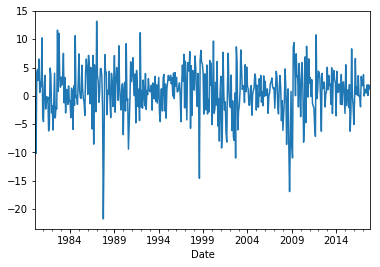

In [8]:
returns.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rol_mean=returns.rolling(window=60,center=False).mean()
    rol_std=returns.rolling(window=60,center=False).std()
     
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
        
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

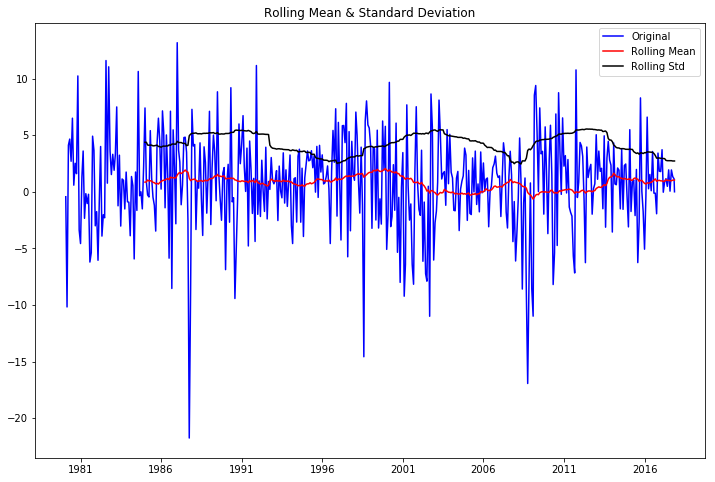

Results of Dickey-Fuller Test:
Test Statistic                 -20.344881
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    454.000000
Critical Value (5%)             -2.867927
Critical Value (1%)             -3.444836
Critical Value (10%)            -2.570172
dtype: float64


In [12]:
test_stationarity(returns)

The null hypothesis is that the series is nonstationary. If we reject the null, we conclude that it is a stationary process

So we have stationary data and can expect to have reliable regression results

In [8]:
def tsplot(y, lags=None, figsize=(18, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

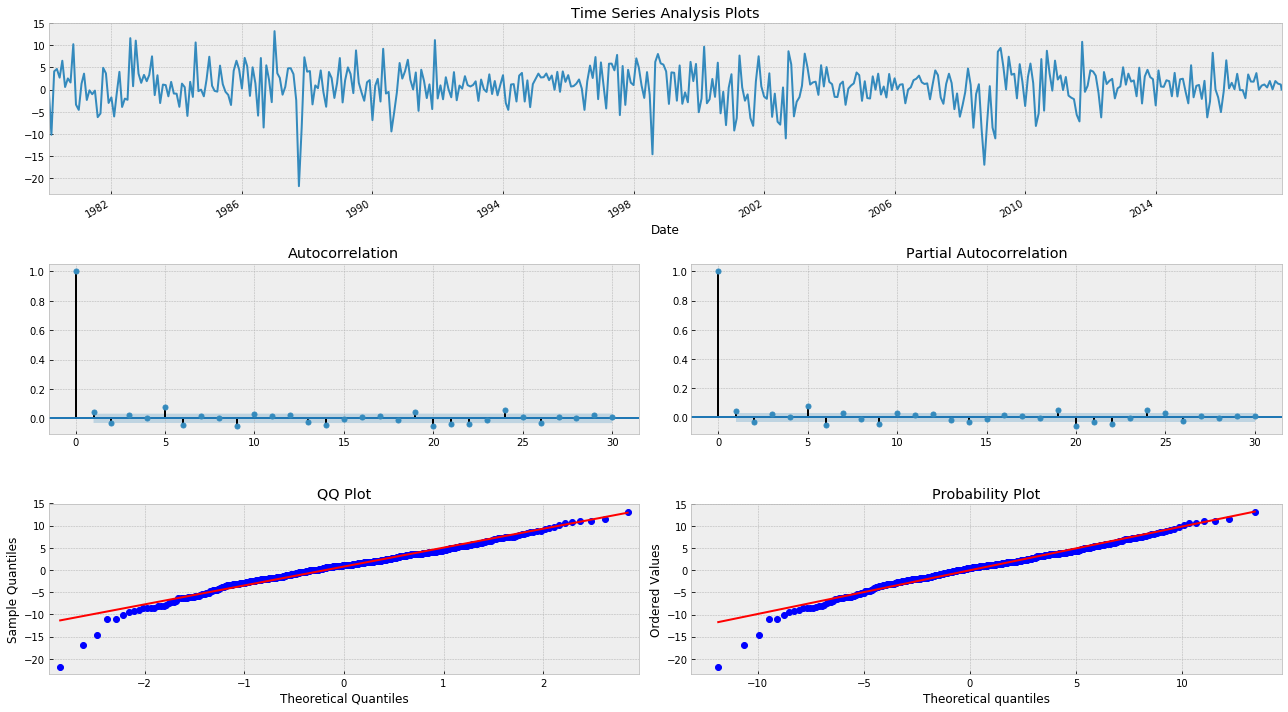

In [15]:
_ = tsplot(returns, lags=30)

Generation of standard deviation and long tearm variance

In [8]:
stdev = returns.std() 
variance = (stdev)**2
stdev_3y = returns.rolling(window =60).std() 

lt_var = (stdev_3y)**2


Importing expansion period data according to NBER classification

In [43]:
data_exp_period = pd.read_excel('expansion.xlsx')
print data_exp_period.head()
print data_exp_period.tail()

        DATE       GSPC1        N2251
0 1980-01-01  114.160004  6764.890137
1 1980-08-01  122.379997  7076.459961
2 1980-09-01  125.459999  7150.750000
3 1980-10-01  127.470001  7123.620117
4 1980-11-01  140.520004  7063.129883
          DATE        GSPC1         N2251
368 2017-07-01  2470.300049  19646.240234
369 2017-08-01  2471.649902  20356.279297
370 2017-09-01  2519.360107  22011.609375
371 2017-10-01  2553.169922  22681.419922
372 2017-11-01  2582.300049  22681.419922


In [44]:
data_exp_period.set_index(data_exp_period['DATE'], inplace=True)
data_exp_period.set_index('DATE', inplace=True) 

In [152]:
print data_exp_period.head()
print data_exp_period.tail()

                 GSPC1        N2251
DATE                               
1980-01-01  114.160004  6764.890137
1980-08-01  122.379997  7076.459961
1980-09-01  125.459999  7150.750000
1980-10-01  127.470001  7123.620117
1980-11-01  140.520004  7063.129883
                  GSPC1         N2251
DATE                                 
2017-07-01  2470.300049  19646.240234
2017-08-01  2471.649902  20356.279297
2017-09-01  2519.360107  22011.609375
2017-10-01  2553.169922  22681.419922
2017-11-01  2582.300049  22681.419922


Generation of returns, standard deviation and long tearm variance for expansion period

In [153]:
data_exp_period['pct_change'] =  100* data_exp_period['GSPC1'].pct_change().dropna()
data_exp_period['stdev'] = data_exp_period['pct_change'].std() 
data_exp_period['variance'] = data_exp_period['stdev']**2
returns =data_exp_period['pct_change']

In [154]:
#table of results
data_exp_period = data_exp_period.dropna()
data_exp_period.head()

,GSPC1,N2251,pct_change,stdev,variance
DATE,,,,,
1980-08-01,122.379997,7076.459961,7.200414,4.348137,18.906299
1980-09-01,125.459999,7150.750000,2.516753,4.348137,18.906299
1980-10-01,127.470001,7123.620117,1.602106,4.348137,18.906299
1980-11-01,140.520004,7063.129883,10.237705,4.348137,18.906299
1980-12-01,135.759995,7254.009766,-3.387424,4.348137,18.906299


In [155]:
# Descriptive Statistics for the expantion period data
data_exp_period.describe()

,GSPC1,N2251,pct_change,stdev,variance
count,372.000000,372.000000,372.000000,3.720000e+02,3.720000e+02
mean,877.777094,16202.079100,0.940378,4.348137e+00,1.890630e+01
std,584.287932,6430.082125,4.348137,3.735373e-14,1.600874e-13
min,122.379997,7063.129883,-30.492522,4.348137e+00,1.890630e+01
25%,331.617508,10880.330078,-1.501943,4.348137e+00,1.890630e+01
50%,915.345001,15848.169922,1.210873,4.348137e+00,1.890630e+01
75%,1292.927520,19570.357910,3.514964,4.348137e+00,1.890630e+01
max,2582.300049,38915.871094,14.229652,4.348137e+00,1.890630e+01


In [57]:
#estimation of the GARCH model for expansion period

GARCH_exp=arch_model(data_exp_period['pct_change'])
resexp = GARCH_exp.fit(update_freq=5, disp='off')
print (resexp.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             pct_change   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -1069.15
Distribution:                  Normal   AIC:                           2146.29
Method:            Maximum Likelihood   BIC:                           2161.96
                                        No. Observations:                  371
Date:                Sat, Nov 18 2017   Df Residuals:                      367
Time:                        14:04:47   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.0245      0.284      3.609  3.078e-04 [  0.468,  1.58

defining conditional variance for the data

In [64]:
cv_exp= resexp.conditional_volatility

Putting the parameters from the GARCH (1,1) model into the equation to forecast next month volatility
with 5_year whole data rolling variance

In [158]:
next_period_var_exp2= 0.1 * np.sqrt(resexp.params['omega']*lt_var+ resexp.params['alpha[1]'] * resexp.resid**2 + cv_exp**2 * resexp.params['beta[1]'])

In [159]:
print next_period_var_exp2.tail()

2017-07-01    0.882909
2017-08-01    0.882706
2017-09-01    0.881499
2017-10-01    0.873215
2017-11-01    0.872511
dtype: float64


the results shows that during  expansion period expacted volatility of S&P

now performing the same with constration period data

In [27]:
data2 = pd.read_excel('constration.xlsx')
print data2.head()

        DaTe      GSPC_p       N225_p
0 1980-02-01  113.660004  6556.189941
1 1980-03-01  102.089996  6865.560059
2 1980-04-01  106.290001  6855.700195
3 1980-05-01  111.239998  6870.700195
4 1980-06-01  114.239998  6819.629883


In [28]:
data2.set_index(data2['DaTe'], inplace=True)
data2.set_index('DaTe', inplace=True) 

In [29]:
return_cons =100 *data2['GSPC_p'].pct_change().dropna()
stdev_cons = return_cons.std() 
variance_cons = (stdev_cons)**2

data2 = data2.dropna()

In [30]:
import arch
from arch import *
#estimation of the GARCH model for constration period
GARCH2=arch_model(return_cons)
res2 = GARCH2.fit(update_freq=5, disp='off')
print (res2.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 GSPC_p   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -393.362
Distribution:                  Normal   AIC:                           794.725
Method:            Maximum Likelihood   BIC:                           804.302
                                        No. Observations:                   81
Date:                Sat, Nov 18 2017   Df Residuals:                       77
Time:                        13:27:31   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             6.1682      3.620      1.704  8.844e-02 [ -0.928, 13.26

Putting the parameters from the GARCH (1,1) model into the equation to forecast next month volatility
with 5_year whole data rolling variance

In [18]:
cv= res2.conditional_volatility
anual_cv=cv*(21)**0.5

In [35]:
next_per = 0.1 * np.sqrt(res2.params['omega'] + res2.params['alpha[1]'] * res2.resid**2 + res2.conditional_volatility**2 * res2.params['beta[1]'])

In [36]:
print next_per.tail()

DaTe
2016-08-01    3.138451
2016-09-01    3.138451
2016-10-01    3.138451
2016-11-01    3.138451
2016-12-01    3.138451
dtype: float64


In [37]:
stdev_3y = return_cons.rolling(window =36).std() 
lt_variance = (stdev_3y)**2

In [39]:
next_per2 = 0.1 * np.sqrt(res2.params['omega']*lt_variance + res2.params['alpha[1]'] * res2.resid**2 + res2.conditional_volatility**2 * res2.params['beta[1]'])

In [40]:
print next_per2.tail()

DaTe
2016-08-01    43.690356
2016-09-01    43.685954
2016-10-01    43.708993
2016-11-01    43.707592
2016-12-01    43.509129
dtype: float64


the results shows that during expansion period expected volatility of S&P , we can see that by 3 year rolling variance by obtain more precise results for construction period

Task 2 

In [51]:
data_exp_period['pch_Nik'] =  100* data_exp_period['N2251'].pct_change().dropna()
data_exp_period['std_Nik'] = data_exp_period['pch_Nik'].std() 
data_exp_period['var_Nik'] = data_exp_period['std_Nik']**2


data_exp_period['pct_change'] =  100* data_exp_period['GSPC1'].pct_change().dropna()
data_exp_period['stdev'] = data_exp_period['pct_change'].std() 
data_exp_period['variance'] = data_exp_period['stdev']**2

In [52]:
data_exp_period = data_exp_period.dropna()
data_exp_period.head()

,GSPC1,N2251,pch_Nik,std_Nik,var_Nik,pct_change,stdev,variance
DATE,,,,,,,,
1980-09-01,125.459999,7150.750000,1.049819,5.746166,33.018425,2.516753,4.341797,18.851197
1980-10-01,127.470001,7123.620117,-0.379399,5.746166,33.018425,1.602106,4.341797,18.851197
1980-11-01,140.520004,7063.129883,-0.849150,5.746166,33.018425,10.237705,4.341797,18.851197
1980-12-01,135.759995,7254.009766,2.702483,5.746166,33.018425,-3.387424,4.341797,18.851197
1981-01-01,129.550003,7146.529785,-1.481663,5.746166,33.018425,-4.574243,4.341797,18.851197


In [53]:
np.cov (data_exp_period['pch_Nik'], data_exp_period['pct_change'])

array([[ 33.01842531,   3.60052029],
       [  3.60052029,  18.8511975 ]])

coveriance forcasting for expantion period

In [68]:
forc_cov1 = 0.1 * np.sqrt(resexp.params['omega']*33.01842531+ resexp.params['alpha[1]'] * resexp.resid**2 + cv_exp**2 * resexp.params['beta[1]'])

In [66]:
print forc_cov1.tail()

DATE
2017-07-01    1.793416
2017-08-01    1.793354
2017-09-01    1.793302
2017-10-01    1.793120
2017-11-01    1.793024
dtype: float64


coveriance forcasting

In [54]:
return_cons =100 *data2['GSPC_p'].pct_change().dropna()
stdev_cons = return_cons.std() 
variance_cons = (stdev_cons)**2

retun_nik =100 *data2['N225_p'].pct_change().dropna()
stdev_nik = return_cons.std() 
variance_nik = (stdev_nik)**2

In [55]:
np.cov (return_cons, retun_nik)

array([[ 982.1542212 ,  263.56933988],
       [ 263.56933988,  481.809573  ]])

In [71]:
next_per2 = 0.1 * np.sqrt(res2.params['omega']*982.1542212 + res2.params['alpha[1]'] * res2.resid**2 + res2.conditional_volatility**2 * res2.params['beta[1]'])

In [72]:
print forc_cov2.tail()

DATE
2017-07-01    1.366283
2017-08-01    1.366202
2017-09-01    1.366134
2017-10-01    1.365895
2017-11-01    1.365769
dtype: float64
